**Packages**

**import packages for computation,preprocessing and model**

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import re
import numpy as np, numpy.random
from scipy.spatial import distance
from tqdm import tqdm
import torch
# import torchtext
# from torchtext.data import get_tokenizer
import nltk
from tqdm import tqdm
from nltk import word_tokenize
nltk.download('punkt')
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
# import string.punctuation
import logging
import pandas as pd
import numpy as np
from numpy import random
# import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
import re
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**used scikit fuzzy to use some fuzzy function**

In [ ]:
!pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.7/dist-packages (0.4.2)


**import packages for model IT2fs**

In [ ]:
from numpy import exp, ones_like, zeros_like, arange, multiply, subtract, add, minimum, maximum, sign, c_, argmax, array
from numpy import sum as npsum
import matplotlib.pyplot as plt
from math import isclose
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

**DATA READING**

In [ ]:
data=pd.read_csv('resume_data1.csv')
print(data.head(2))
data=data.drop(['City', 'State', 'Links', 'Additional Information'] , axis =1)


data=data.dropna()
data=data.reset_index(drop=True)

   Unnamed: 0  ...                             Additional Information
0           0  ...  \nTechnical Expertise \n• Operating Systems: W...
1           1  ...                                               NONE

[2 rows x 11 columns]


**Data cleaninig function**

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(str(text))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + lemmatizer.lemmatize(w)
    return new_text

**merge the coulmns of csv five to make one column**

In [ ]:
temp = data["Resume_title"] +" "+ data["Description"]+" "+ data["work_experiences"]+" "+ data["Educations"]+" "+ data["Skills"]+" "+ data["Certificates"]
temp.columns = ['data']

In [ ]:
temp[:2]

0    Java Developer To prove myself dedicated, wort...
1    Software Developer Working as Software Develop...
dtype: object

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**cleaning of data**

In [ ]:
data_temp = temp[:1500].apply(clean_text)
data_temp

0        java developer prove dedicated worthy energet...
1        software developer working software developer...
2        java developer looking challenging career dem...
3        seeking innovative challenging career assignm...
4        none none wtitle java developer wcompany cred...
                              ...                        
1495     none none wtitle php web developer wcompany s...
1496     none become successful professional gain expo...
1497     php developer learn function effectively orga...
1498     none professional summary completed java jse ...
1499     php developer none wtitle php developer train...
Length: 1500, dtype: object

In [ ]:
data_temp.to_csv('clean_data3.csv')

**vectorize the data**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_temp) 
X = X.toarray()
temp = []
for _ in X:
    temp.append(list(_))

In [ ]:
keys = list(vectorizer.vocabulary_.keys())
values = list(vectorizer.vocabulary_.values())

In [ ]:
zipped_pairs = zip(values, keys)
_keys = [x for _, x in sorted(zipped_pairs)]

In [ ]:
len(_keys)

13190

In [ ]:
colm = _keys
df = pd.DataFrame(temp)
# df = df.transpose()
df.columns = colm
df

,_______,aa,aabsaheb,aaccumen,aadarsh,aadhar,aakulwad,aalim,aaradhya,aarti,ab,abc,abdul,abhinav,ability,able,about,abovementioned,abp,abpenny,abreast,absence,absolute,absorb,abstract,abstraction,abudhabi,abul,abuse,abv,ac,acadamy,academic,academically,academy,acadimic,acadmic,acaim,acaimorg,acapellas,...,zeal,zedex,zehra,zelianto,zend,zendframework,zenith,zenox,zenscale,zero,zeronsec,zest,zeteo,zeyden,zf,zilha,zilla,zillion,zing,zion,zipari,zirakpur,zk,zoho,zomato,zonal,zone,zookeeper,zoology,zoom,zoondia,zp,zph,zphigh,zphs,zpp,zulahoo,zycus,zylma,zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv('vector_resume3.csv') 

In [ ]:
res=df.sum(axis = 0)
num=res.median()
df.drop([col for col, val in df.sum().iteritems() if val < 6], axis=1, inplace=True)
#res.mean(axis = 0)
#res.median(axis=0)
#t=df.sum(axis=0)
#t.head(60)

**USER skil set data**

In [ ]:
sk=input("enter the full skill set")
print(sk)

enter the full skill setjava developer object oriented programmer hardworking adaptable flexible
java developer object oriented programmer hardworking adaptable flexible


In [ ]:
#tsk=sk.apply(clean_text)
tsk=sk.split()
tsk
val = pd.DataFrame(0,index=range(1500),columns=range(2))
val

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1495,0,0
1496,0,0
1497,0,0
1498,0,0


**Create dataframe for skilled and unskilled word frequencies **

In [ ]:
cl=df.columns

for i in cl:
  if i in tsk:
    for j in range(0,1500):
      val.iat[j,1]=val.iat[j,1]+ df.loc[j,i]
  else:
    for j in range(0,1500):
      val.iat[j,0]=val.iat[j,0]+ df.loc[j,i]

    

In [ ]:
val

,0,1
0,117,9
1,100,7
2,60,6
3,68,5
4,185,9
...,...,...
1495,89,2
1496,227,4
1497,53,2
1498,91,5


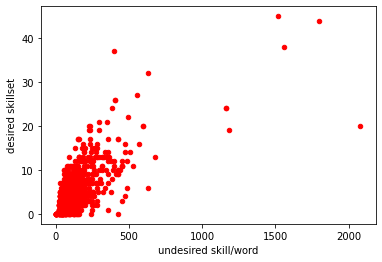

In [ ]:
val.plot(kind='scatter',x=0,y=1,color='red')
plt.xlabel('undesired skill/word')
plt.ylabel('desired skillset')
plt.show()

**Magnifies the desired count**

In [ ]:
co=val.columns

for i in co:
  for j in range(0,1500):
    val.iat[j,1]= val.iat[j,1] * ((val.iat[j,1]/(val.iat[j,0]+val.iat[j,1]))*100)


In [ ]:
val

,0,1
0,117,2262
1,100,1396
2,60,2557
3,68,1133
4,185,743
...,...,...
1495,89,17
1496,227,15
1497,53,81
1498,91,577


**Graph of all the resumes according to their updated value**

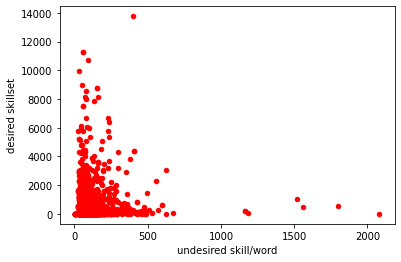

In [ ]:
val.plot(kind='scatter',x=0,y=1,color='red')
plt.xlabel('undesired skill/word')
plt.ylabel('desired skillset')
plt.show()

**Implimentation of Fuzzy c mean **

In [ ]:
k = 2
p = 2


In [ ]:
X = pd.DataFrame(val)
n = len(X)
d = len(X.columns)
addZeros = np.zeros((n, 1))
X = np.append(X, addZeros, axis=1)
C = np.zeros((k,d+1))

In [ ]:
weight = np.random.dirichlet(np.ones(k),size=n)
for it in range(3): # Total number of iterations
    
    # Compute centroid
    for j in range(k):
        denoSum = sum(np.power(weight[:,j],2))
        
        sumMM =0
        for i in range(n):
            mm = np.multiply(np.power(weight[i,j],p),X[i,:])
            sumMM +=mm
        cc = sumMM/denoSum
        C[j] = np.reshape(cc,d+1)
 
    #print("\nUpdating the fuzzy pseudo partition")
    for i in range(n):
        denoSumNext = 0
        for j in range(k):
             denoSumNext += np.power(1/distance.euclidean(C[j,0:d], X[i,0:d]),1/(p-1))
        for j in range(k):
            w = np.power((1/distance.euclidean(C[j,0:d], X[i,0:d])),1/(p-1))/denoSumNext
            weight[i,j] = w  

In [ ]:
for i in range(n):    
    cNumber = np.where(weight[i] == np.amax(weight[i]))
    X[i,d] = cNumber[0]

In [ ]:
SSE = 0
for j in range(k):
    for i in range(n):
        SSE += np.power(weight[i,j],p)*distance.euclidean(C[j,0:d], X[i,0:d])

**graph of the cluster made by the Fuzzy c mean **

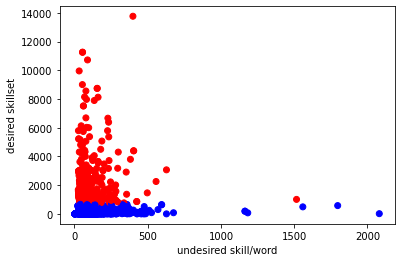

In [ ]:
df = pd.DataFrame(X)

fig, ax = plt.subplots()

colors = {0:'red', 1:'blue'}

ax.scatter(df[0], df[1], c=df[2].apply(lambda x: colors[x]))
#val.plot(kind='scatter',x=0,y=1)
plt.xlabel('undesired skill/word')
plt.ylabel('desired skillset')
plt.show()

**Adding new column as the percentage of skilled  and unskilled words after magnification**

In [ ]:
df.insert(0, "R_no", [*range(0, 1500, 1)], True) 
df["per_0"]=df[0]/(df[0]+df[1])
df["per_1"]=df[1]/(df[0]+df[1])

df

,R_no,0,1,2,per_0,per_1
0,0,117.0,2262.0,0.0,0.049180,0.950820
1,1,100.0,1396.0,0.0,0.066845,0.933155
2,2,60.0,2557.0,0.0,0.022927,0.977073
3,3,68.0,1133.0,0.0,0.056619,0.943381
4,4,185.0,743.0,0.0,0.199353,0.800647
...,...,...,...,...,...,...
1495,1495,89.0,17.0,1.0,0.839623,0.160377
1496,1496,227.0,15.0,1.0,0.938017,0.061983
1497,1497,53.0,81.0,1.0,0.395522,0.604478
1498,1498,91.0,577.0,1.0,0.136228,0.863772


In [ ]:
df.to_csv('clst1.csv')

In [ ]:
df.tail(20)

,R_no,0,1,2,per_0,per_1
1480,1480,80.0,111.0,1.0,0.418848,0.581152
1481,1481,91.0,577.0,1.0,0.136228,0.863772
1482,1482,72.0,32.0,1.0,0.692308,0.307692
1483,1483,88.0,83.0,1.0,0.514620,0.485380
1484,1484,37.0,212.0,1.0,0.148594,0.851406
1485,1485,66.0,35.0,1.0,0.653465,0.346535
1486,1486,53.0,81.0,1.0,0.395522,0.604478
1487,1487,80.0,111.0,1.0,0.418848,0.581152
1488,1488,43.0,125.0,1.0,0.255952,0.744048
1489,1489,56.0,1.0,1.0,0.982456,0.017544


In [ ]:
rti=len(df[df[2]>0])
rti=rti/len(df)
rti

0.7446666666666667

In [ ]:
ndf=df[df[2]!=0]
ndf

,R_no,0,1,2,per_0,per_1
16,16,104.0,384.0,1.0,0.213115,0.786885
55,55,140.0,629.0,1.0,0.182055,0.817945
59,59,94.0,525.0,1.0,0.151858,0.848142
62,62,55.0,321.0,1.0,0.146277,0.853723
72,72,66.0,213.0,1.0,0.236559,0.763441
...,...,...,...,...,...,...
1495,1495,89.0,17.0,1.0,0.839623,0.160377
1496,1496,227.0,15.0,1.0,0.938017,0.061983
1497,1497,53.0,81.0,1.0,0.395522,0.604478
1498,1498,91.0,577.0,1.0,0.136228,0.863772


In [ ]:
ndf.to_csv('resclst1.csv')

**Membership function for IT2fs**

In [ ]:
#Zero Membership Function
def zero_mf(x, params=None):
  return zeros_like(x)

#Constant Membership Function
def const_mf(x, params):
  return multiply(params[0], ones_like(x)) 

#Triangular Membership Function
def tri_mf(x, params):
  return minimum(1, maximum(0, ((params[3] * (x - params[0]) / (params[1] - params[0])) * (x <= params[1]) + \
               ((params[3] * ((params[2] - x) / (params[2] - params[1]))) * (x > params[1]))) )) 

#Trapezoidal Membership Function
def trapezoid_mf(x, params):
  return minimum(1, maximum(0, ((((params[4] * ((x - params[0]) / (params[1] - params[0]))) * (x <= params[1])) +
                   ((params[4] * ((params[3] - x) / (params[3] - params[2]))) * (x >= params[2]))) +
               (params[4] * ((x > params[1]) * (x < params[2])))) ))
  
#Gaussian Membership Function
def gaussian_mf(x, params):
  return params[2] * exp(-(((params[0] - x) ** 2) / (2 * params[1] ** 2)))

In [ ]:
#Gaussian Mean Upper Membership Function
def gauss_uncert_mean_umf(x, params):
  return (((gaussian_mf(x, [params[0], params[2], params[3]]) * (x <= params[0])) +
             (gaussian_mf(x, [params[1], params[2], params[3]]) * (x >= params[1]))) +
               (params[3] * ((x > params[0]) * (x < params[1]))))

#Gaussian Standard Upper Membership Function
def gauss_uncert_std_umf(x, params):
  return gaussian_mf(x, [params[0], params[2], params[3]])

#Gaussian Mean Lower Membership Function
def gauss_uncert_mean_lmf(x, params):
  return ((gaussian_mf(x, [params[0], params[2], params[3]]) * (x >= (params[0] + params[1]) / 2)) +
            (gaussian_mf(x, [params[1], params[2], params[3]]) * (x < (params[0] + params[1]) / 2)))

#Gaussian Standard Lower Membership Function 
def gauss_uncert_std_lmf(x, params):
  return gaussian_mf(x, [params[0], params[1], params[3]])

    
    

In [ ]:
#Gaussian Mean Membership Function
def IT2FS_Gaussian_UncertMean(domain, params):
  ml = params[0] - params[1] / 2.
  mr = params[0] + params[1] / 2.
  return IT2FS(domain, gauss_uncert_mean_umf, [ml, mr, params[2], 1], gauss_uncert_mean_lmf, [ml, mr, params[2], 1])

#Gaussian Standard Membership Function
def IT2FS_Gaussian_UncertStd(domain, params):
    stdl = params[1] - params[2] / 2
    stdr = params[1] + params[2] / 2
    return IT2FS(domain, gauss_uncert_std_umf, [params[0], stdl, stdr, 1], gauss_uncert_std_lmf, [params[0], stdl, stdr, 1])

In [ ]:
def IT2FS_plot(*sets, title=None, legends=None, filename=None):
    plt.figure()
    for it2fs in sets:
        plt.fill_between(it2fs.domain, it2fs.upper, it2fs.lower, alpha=0.5)
    if legends is not None:
        plt.legend(legends)
    for it2fs in sets:
        plt.plot(it2fs.domain, it2fs.lower, color="black")
        plt.plot(it2fs.domain, it2fs.upper, color="black")
    if title is not None:
        plt.title(title)
    plt.xlabel("Domain")
    plt.ylabel("Membership degree")
    plt.grid(True)
    plt.show()


def TR_plot(domain, tr, title=None, legend=None, filename=None):
    plt.figure()
    plt.plot([min(domain), tr[0], tr[0], tr[1], tr[1], max(domain)], 
              [0, 0, 1, 1, 0, 0], linewidth=2)
    plt.xlim((min(domain), max(domain)))
    plt.xlabel("Domain")
    plt.ylabel("Membership degree")
    if title is not None:
        plt.title(title)
    if legend is not None:
        plt.legend([legend])
    plt.grid(True)
    plt.show()

In [ ]:
#Interval Type 2 Fuzzy Object
class IT2FS(object):
    
    def __init__(self, domain, umf=zero_mf, umf_params=[], lmf=zero_mf, lmf_params=[], check_set=False):
        self.umf = umf
        self.lmf = lmf
        self.umf_params = umf_params
        self.lmf_params = lmf_params

        self.domain = domain
        self.upper = maximum(minimum(umf(domain, umf_params), 1), 0)
        self.lower = maximum(minimum(lmf(domain, lmf_params), 1), 0)
        if check_set:
            self.check_set()

    def check_set(self):
        """
        Verifies the LMF(x) < UMF(x) for any x in the domain.
        """
        for l, u in zip(self.lower, self.upper):
            if l > u:
                raise ValueError("LMF in some points in domain is larger than UMF.")

    def copy(self):
        
        return IT2FS(self.domain, umf=self.umf, umf_params=self.umf_params, lmf=self.lmf, lmf_params=self.lmf_params)

    def plot(self, title=None, legend_text=None, filename=None):
        
        plt.figure()
        plt.fill_between(self.domain, self.upper, self.lower)
        if legend_text is not None:
            plt.legend([legend_text])
        if title is not None:
            plt.title(title)
        plt.plot(self.domain, self.upper, color="black")
        plt.plot(self.domain, self.lower, color="black")
        plt.grid(True)
        plt.xlabel("Domain")
        plt.ylabel("Membership degree")
        if filename is not None:
            plt.savefig(filename + ".pdf", format="pdf", dpi=300, bbox_inches="tight")
        plt.show()

    def __neg__(self):
        
        neg_it2fs = IT2FS(self.domain)
        neg_it2fs.upper = subtract(1, self.upper)
        neg_it2fs.lower = subtract(1, self.lower)
        return neg_it2fs

In [ ]:
# T_norm function
def min_t_norm(a, b):
    return minimum(a, b)
def product_t_norm(a, b):
    return multiply(a, b)

# S_norm function       
def max_s_norm(a, b):
    return maximum(a, b) 

# Meet function    
def meet(domain, it2fs1, it2fs2, t_norm):
    it2fs = IT2FS(domain)
    it2fs.upper = t_norm(it2fs1.upper, it2fs2.upper)
    it2fs.lower = t_norm(it2fs1.lower, it2fs2.lower)
    return it2fs

#Join Function
def join(domain, it2fs1, it2fs2, s_norm):
    it2fs = IT2FS(domain)
    it2fs.upper = s_norm(it2fs1.upper, it2fs2.upper)
    it2fs.lower = s_norm(it2fs1.lower, it2fs2.lower)
    return it2fs

#Type Reduction Function
# Algorithm Used - Karnik Mendel Algorithm
def KM_algorithm(intervals, params=None):  

    # left calculations
    intervals = intervals[intervals[:,0].argsort()]
    w_l = (intervals[:, 2] + intervals[:, 3]) / 2.

    N = len(intervals)
    y_l_prime_num = npsum(intervals[:, 0] * w_l)
    y_l_prime_den = npsum(w_l)
    y_l_prime = y_l_prime_num / y_l_prime_den
    while True:
        k_l = 0
        for i in range(1, N):
            if (intervals[i-1, 0] <= y_l_prime <= intervals[i, 0]) or \
                isclose(intervals[i-1, 0], y_l_prime) or \
                isclose(y_l_prime, intervals[i, 0]):
                k_l = i-1
                break
        
        ii = arange(N)
        w_l = (ii <= k_l) * intervals[:, 3] + (ii > k_l) * intervals[:, 2]
        y_l_num = npsum(intervals[:k_l+1, 0] * intervals[:k_l+1, 3])
        y_l_den = npsum(intervals[:k_l+1, 3])
        y_l_num += npsum(intervals[k_l+1:, 0] * intervals[k_l+1:, 2])
        y_l_den += npsum(intervals[k_l+1:, 2])
        y_l = y_l_num / y_l_den
        if y_l == y_l_prime:
            break
        else:
            y_l_prime = y_l
    # right calculations
    intervals = intervals[intervals[:, 1].argsort()]
    w_r = (intervals[:, 2] + intervals[:, 3]) / 2.
    
    N = len(intervals)
    y_r_prime_num = npsum(intervals[:, 1] * w_r)
    y_r_prime_den = npsum(w_r)
    y_r_prime = y_r_prime_num / y_r_prime_den
    while True:
        k_r = 0
        for i in range(1, N):
            if (intervals[i-1, 1] <= y_r_prime <= intervals[i, 1]) or \
                isclose(intervals[i-1, 1], y_r_prime) or \
                isclose(y_r_prime, intervals[i, 1]):
                k_r = i-1
                break
        
        ii = arange(N)
        w_r = (ii <= k_r) * intervals[:, 2] + (ii > k_r) * intervals[:, 3]
        y_r_num = npsum(intervals[:k_r+1, 1] * intervals[:k_r+1, 2])
        y_r_den = npsum(intervals[:k_r+1, 2])
        y_r_num += npsum(intervals[k_r+1:, 1] * intervals[k_r+1:, 3])
        y_r_den += npsum(intervals[k_r+1:, 3])
        y_r = y_r_num / y_r_den
        if y_r == y_r_prime:
            break
        else:
            y_r_prime = y_r
    return y_l, y_r

#Defuzzification Function
def Centroid(it2fs, alg_func, domain, alg_params=None):
    intervals = c_[domain, domain, it2fs.lower, it2fs.upper]
    return alg_func(intervals, alg_params)

#Output Functions after Dufuzzification to give crisp output

def crisp(tr):
   return (tr[0] + tr[1]) / 2

def crisp_list(trs, o=None):
  if o is None:
        output = {}
        for key in trs[0].keys():
            output[key] = []
        for tr in trs:
            for key in trs[0].keys():
                output[key].append(crisp(tr[key]))
        return output
            
  else:
      output = []
      for tr in trs:
          output.append(crisp(tr[o]))
      return output

In [ ]:
class IT2FLS(object):
    
    def __init__(self):
        self.inputs = []
        self.outputs = []
        self.rules = []

    def add_input_variable(self, name):
       
        self.inputs.append(name)

    def add_output_variable(self, name):
       
        self.outputs.append(name)

    def add_rule(self, antecedent, consequent):
        
        self.rules.append((antecedent, consequent))

    def copy(self):
        o = IT2FLS()
        o.inputs = self.inputs.copy()
        o.outputs = self.outputs.copy()
        o.rules = self.rules.copy()
        return o
    
    def evaluate(self, inputs, t_norm, s_norm, domain,method_params=None, algorithm_params=None):
      alg_func = KM_algorithm
      
      B = {out: [] for out in self.outputs}
      for rule in self.rules:
          u = 1
          l = 1
          for input_statement in rule[0]:
              u = t_norm(u, input_statement[1].umf(inputs[input_statement[0]], input_statement[1].umf_params))
              l = t_norm(l, input_statement[1].lmf(inputs[input_statement[0]], input_statement[1].lmf_params))
          for consequent in rule[1]:
              B_l = meet(domain, IT2FS(domain, const_mf, [u], const_mf, [l]), consequent[1], t_norm)
              B[consequent[0]].append(B_l)
      C = {out: IT2FS(domain) for out in self.outputs}
      TR = {}
      for out in self.outputs:
          for B_l in B[out]:
              C[out] = join(domain, C[out], B_l, s_norm)
          TR[out] = Centroid(C[out], alg_func, domain, alg_params=algorithm_params)
      return C, TR

Input Membership Function


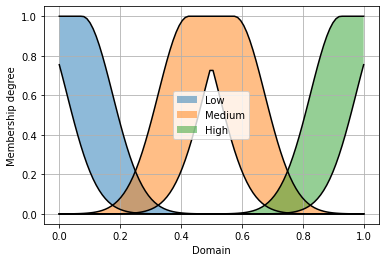

Output membership function


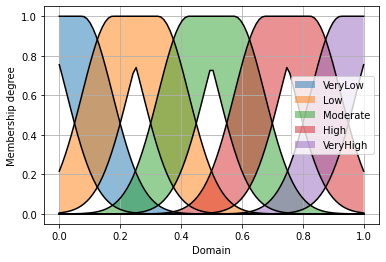

In [ ]:
#Establishing the Input and Output Membership functions

domain=np.linspace(0.,1.,100)
low = IT2FS_Gaussian_UncertMean(domain,[0,0.15,0.1])
medium = IT2FS_Gaussian_UncertMean(domain,[0.5,0.15,0.1])
high = IT2FS_Gaussian_UncertMean(domain,[1.0,0.15,0.1])

print("Input Membership Function") 
IT2FS_plot(low, medium, high, legends=["Low", "Medium", "High"], filename="simp_ex_sets")

verylow = IT2FS_Gaussian_UncertMean(domain,[0,0.15,0.1])
Low = IT2FS_Gaussian_UncertMean(domain,[0.25,0.15,0.1])
moderate = IT2FS_Gaussian_UncertMean(domain,[0.5,0.15,0.1])
High = IT2FS_Gaussian_UncertMean(domain,[0.75,0.15,0.1])
veryhigh = IT2FS_Gaussian_UncertMean(domain,[1.0,0.15,0.1])

print("Output membership function")
IT2FS_plot(verylow, Low, moderate, High, veryhigh, legends=["VeryLow", "Low", "Moderate", "High", "VeryHigh"], filename="simp_ex_sets")

In [ ]:
#Adding Input and Output Variables

myIT2FLS = IT2FLS()
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_output_variable("y1")

#Adding rules of the logic System
myIT2FLS.add_rule([("x1", low), ("x2", low)], [("y1", verylow)])
myIT2FLS.add_rule([("x1", low), ("x2", medium)], [("y1", Low)])
myIT2FLS.add_rule([("x1", low), ("x2", high)], [("y1", moderate)])
myIT2FLS.add_rule([("x1", medium), ("x2", low)], [("y1", Low)])
myIT2FLS.add_rule([("x1", medium), ("x2", medium)], [("y1", moderate)])
myIT2FLS.add_rule([("x1", medium), ("x2", high)], [("y1", High)])
myIT2FLS.add_rule([("x1", high), ("x2", low)], [("y1", moderate)])
myIT2FLS.add_rule([("x1", high), ("x2", medium)], [("y1", High)])
myIT2FLS.add_rule([("x1", high), ("x2", high)], [("y1", veryhigh)])

**IT2fs model for skilled words anfd user given weightage**

In [ ]:
print("enter weightage of skilled word")
x1=float(input())
print("enter the weightage of the non skilled word")
x2=float(input())
print("enter the cutt of ratio")
x3=float(input())

enter weightage of skilled word
0.8
enter the weightage of the non skilled word
0.1
enter the cutt of ratio
1


In [ ]:
res=[0]*len(ndf)
for i in range(len(ndf)):
  val1=x1   #df["per_0"][i]
  val2=ndf.iat[i,5]
  it2out, tr = myIT2FLS.evaluate({"x1":val1, "x2":val2}, min_t_norm, max_s_norm, domain)

  #The FuzzySystem Output plot before type-reduction
  #print("The FuzzySystem Output plot before type-reduction")
  #it2out["y1"].plot(filename="y1_out")

  #The FuzzySystem Output plot after type-reduction
  #print("The FuzzySystem Output plot after type-reduction")
  #TR_plot(domain, tr["y1"], filename="y1_tr")

  #Defuuzzifying to get a crisp output using centroid method
  res[i]= crisp(tr["y1"])

res

**IT2fs model for unskilled words anfd user given weightage**

In [ ]:
rs=[0]*len(ndf)
for i in range(len(ndf)):
  val1=x2   #df["per_0"][i]
  val2=ndf.iat[i,4]
  it2out, tr = myIT2FLS.evaluate({"x1":val1, "x2":val2}, min_t_norm, max_s_norm, domain)

  #The FuzzySystem Output plot before type-reduction
  #print("The FuzzySystem Output plot before type-reduction")
  #it2out["y1"].plot(filename="y1_out")

  #The FuzzySystem Output plot after type-reduction
  #print("The FuzzySystem Output plot after type-reduction")
  #TR_plot(domain, tr["y1"], filename="y1_tr")

  #Defuuzzifying to get a crisp output using centroid method
  rs[i]= crisp(tr["y1"])

rs

**user cuttoff and ratio of slected cluster in IT2fs model**

The FuzzySystem Output plot before type-reduction


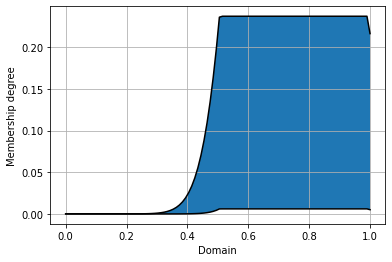

The FuzzySystem Output plot after type-reduction


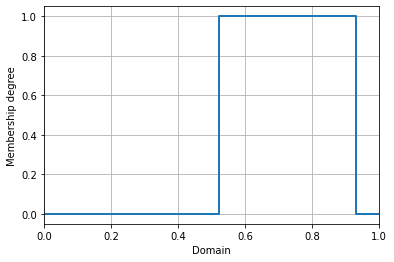

0.7268351441521964


In [ ]:
#Evaluating the IT-2 inference system with T-I inputs
val1=rti
val2=x3
it2out, tr = myIT2FLS.evaluate({"x1":val1, "x2":val2}, min_t_norm, max_s_norm, domain)

#The FuzzySystem Output plot before type-reduction
print("The FuzzySystem Output plot before type-reduction")
it2out["y1"].plot(filename="y1_out")

#The FuzzySystem Output plot after type-reduction
print("The FuzzySystem Output plot after type-reduction")
TR_plot(domain, tr["y1"], filename="y1_tr")

#Defuuzzifying to get a crisp output using centroid method
result = crisp(tr["y1"])
print(result)

In [ ]:
ss=[0]*len(ndf)
for i in range(len(ndf)):
  ss[i]=(res[i]+rs[i])

ss

In [ ]:
ndf["res"]=ss
ndf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,R_no,0,1,2,per_0,per_1,res
16,16,104.0,384.0,1.0,0.213115,0.786885,0.915616
55,55,140.0,629.0,1.0,0.182055,0.817945,0.904039
59,59,94.0,525.0,1.0,0.151858,0.848142,0.885992
62,62,55.0,321.0,1.0,0.146277,0.853723,0.884160
72,72,66.0,213.0,1.0,0.236559,0.763441,0.914309
...,...,...,...,...,...,...,...
1495,1495,89.0,17.0,1.0,0.839623,0.160377,0.968718
1496,1496,227.0,15.0,1.0,0.938017,0.061983,0.964155
1497,1497,53.0,81.0,1.0,0.395522,0.604478,0.930012
1498,1498,91.0,577.0,1.0,0.136228,0.863772,0.882069


In [ ]:
final_df = ndf.sort_values(by=['res'], ascending=False)
final_df

,R_no,0,1,2,per_0,per_1,res
1075,1075,84.0,18.0,1.0,0.823529,0.176471,0.969469
1153,1153,84.0,18.0,1.0,0.823529,0.176471,0.969469
1144,1144,84.0,18.0,1.0,0.823529,0.176471,0.969469
1082,1082,42.0,9.0,1.0,0.823529,0.176471,0.969469
1023,1023,127.0,27.0,1.0,0.824675,0.175325,0.969433
...,...,...,...,...,...,...,...
358,358,49.0,437.0,1.0,0.100823,0.899177,0.879622
99,99,49.0,437.0,1.0,0.100823,0.899177,0.879622
420,420,49.0,437.0,1.0,0.100823,0.899177,0.879622
102,102,49.0,437.0,1.0,0.100823,0.899177,0.879622
